In [1]:
from Functions.func import NPZDatasetManager,ClassDistributionPlotter,BalancedDatasetSampler, generate_dataset_info,DatasetSplitter,ImageTransformer
from Functions.func import visualize_image_channels
import numpy as np

In [2]:
manager = NPZDatasetManager("Data")

Number of .npz files in the path: 2
Data/jetImage_7_100p_40000_50000.npz
Data/Jet Image 10000-20000.npz


In [3]:
my_dataset = manager.load_npz_by_index(0)
(my_dataset['jetClass'])

Keys in the NPZ file: ['jetImage', 'jetClass']


array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [4]:
#load the x and y del dataset
var_x = my_dataset['jetImage']
var_y = my_dataset['jetClass']
plotter = ClassDistributionPlotter(var_y)

First create a Dictionary for the data 

In [5]:
#First create a Dictionary for the data 
#dict of particle
particles = {
    "gluons": [1, 0, 0, 0, 0],
    "quarks": [0, 1, 0, 0, 0],
    "Ws":     [0, 0, 1, 0, 0],
    "Zs":     [0, 0, 0, 1, 0],
    "tops":   [0, 0, 0, 0, 1]
}
particle_dict = {
    "gluons": 0,
    "quarks": 1,
    "Ws":     2,
    "Zs":     3,
    "tops":   4
}

class_names = ["Gluons", "Quarks", "Ws", "Zs", "Tops"]

/Users/bryphy/U/ML jet tag/JetTag/Functions/func.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sean.barplot(x='Class', y='Count', data=data, palette=palette)


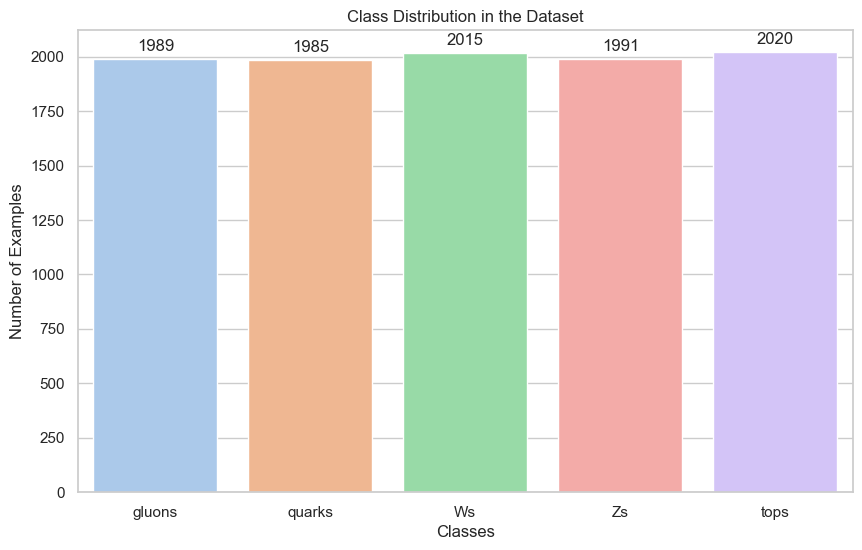

In [6]:


# Create an instance of the ClassDistributionPlotter
plotter = ClassDistributionPlotter(var_y)
# Map labels to class names
plotter.map_labels(particle_dict)
# Plot the distribution
plotter.plot_distribution()


/Users/bryphy/U/ML jet tag/JetTag/Functions/func.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sean.barplot(x='Class', y='Count', data=data, palette=palette)


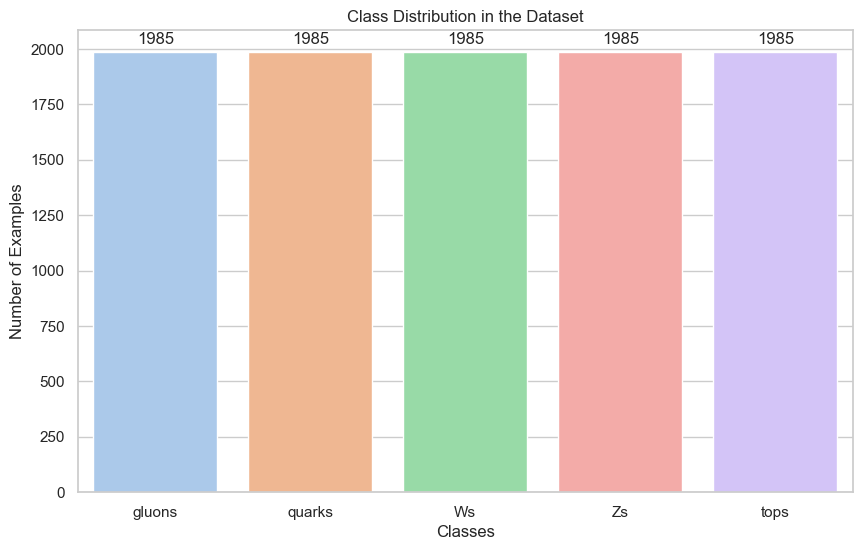

In [7]:
balanced_sampler = BalancedDatasetSampler(var_x, var_y)
balanced_sampler.balance_dataset(shuffle=False)
images = balanced_sampler.balanced_images
labels = balanced_sampler.balanced_labels

plotter = ClassDistributionPlotter(labels)
# Map labels to class names
plotter.map_labels(particle_dict)
# Plot the distribution
plotter.plot_distribution()

In [8]:
info_result = generate_dataset_info(images, labels)
print(info_result)

Length of images: 9925
Shape of images: (9925, 100, 100)
Shape of the first element of images: (100, 100)
Length of labels: 9925
Shape of labels: (9925, 5)
Shape of the first element of labels: (5,)


In [9]:

# Check if expanding the dimensions of the images is necessary
if images.ndim == 3:
    # Add a third axis for the channel
    images = np.expand_dims(images, axis=-1)

In [10]:
info_result = generate_dataset_info(images, labels)
print(info_result)

Length of images: 9925
Shape of images: (9925, 100, 100, 1)
Shape of the first element of images: (100, 100, 1)
Length of labels: 9925
Shape of labels: (9925, 5)
Shape of the first element of labels: (5,)


In [11]:
splitter = DatasetSplitter(train_size=0.8, val_size=0.1, test_size=0.1)
splits = splitter.split_data(images, labels)

Dimensions of the training set:  (7939, 100, 100, 1)
Dimensions of the validation set:  (993, 100, 100, 1)
Dimensions of the test set:  (993, 100, 100, 1)


In [12]:
import tensorflow as tf

In [13]:
transformation_lay = [
   
]


In [14]:
transformer = ImageTransformer()

In [20]:
X_train_transformed, y_train_transformed = transformer.apply_transformset(splits['X_train'], splits['y_train'],
                                                              transformation_list= transformation_lay,
                                                              normalize_function=True,
                                                              apply_fft=True)


In [21]:
X_train_transformed_info = generate_dataset_info(X_train_transformed.numpy(),
                                                 y_train_transformed.numpy())
print(X_train_transformed_info)

Length of images: 7939
Shape of images: (7939, 100, 100, 2)
Shape of the first element of images: (100, 100, 2)
Length of labels: 7939
Shape of labels: (7939, 5)
Shape of the first element of labels: (5,)


In [22]:

X_val_transformed, y_val_transformed = transformer.apply_transformset(splits['X_val'], splits['y_val'],
                                                             transformation_list= transformation_lay,
                                                              normalize_function=True,
                                                              apply_fft=True)

In [23]:
X_val_transformed_info = generate_dataset_info(X_val_transformed.numpy(),
                                               y_val_transformed.numpy())
print(X_val_transformed_info)

Length of images: 993
Shape of images: (993, 100, 100, 2)
Shape of the first element of images: (100, 100, 2)
Length of labels: 993
Shape of labels: (993, 5)
Shape of the first element of labels: (5,)


In [24]:

X_test_transformed, y_test_transformed = transformer.apply_transformset(splits['X_test'], splits['y_test'],
                                                              #transformation_list= transformation_lay, --> is not't necesary for test data
                                                              normalize_function=True,
                                                              apply_fft=True)


In [25]:
	

X_test_transformed_info = generate_dataset_info(X_test_transformed.numpy(),
                                               y_test_transformed.numpy()
                                               )
print(X_test_transformed_info)

Length of images: 993
Shape of images: (993, 100, 100, 2)
Shape of the first element of images: (100, 100, 2)
Length of labels: 993
Shape of labels: (993, 5)
Shape of the first element of labels: (5,)


In [26]:

n_batch= 128
train_loader = tf.data.Dataset.from_tensor_slices((X_train_transformed, y_train_transformed)).shuffle(buffer_size=len(X_train_transformed)).batch(n_batch)
val_loader = tf.data.Dataset.from_tensor_slices((X_val_transformed, y_val_transformed)).batch(n_batch)
test_loader = tf.data.Dataset.from_tensor_slices((X_test_transformed, y_test_transformed)).batch(n_batch)

In [27]:

def print_batch_shapes(loader, data_type):
    for X, y in loader:
        print(f"#--- {data_type} batch's shapes---------------")
        print(f"Shape of X [N,  H, W ,C]: {X.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}")
        break

print_batch_shapes(train_loader, "Training")
print_batch_shapes(val_loader, "Validation")
print_batch_shapes(test_loader, "Testing")

#--- Training batch's shapes---------------
Shape of X [N,  H, W ,C]: (128, 100, 100, 2)
Shape of y: (128, 5) <dtype: 'float32'>
#--- Validation batch's shapes---------------
Shape of X [N,  H, W ,C]: (128, 100, 100, 2)
Shape of y: (128, 5) <dtype: 'float32'>
#--- Testing batch's shapes---------------
Shape of X [N,  H, W ,C]: (128, 100, 100, 2)
Shape of y: (128, 5) <dtype: 'float32'>


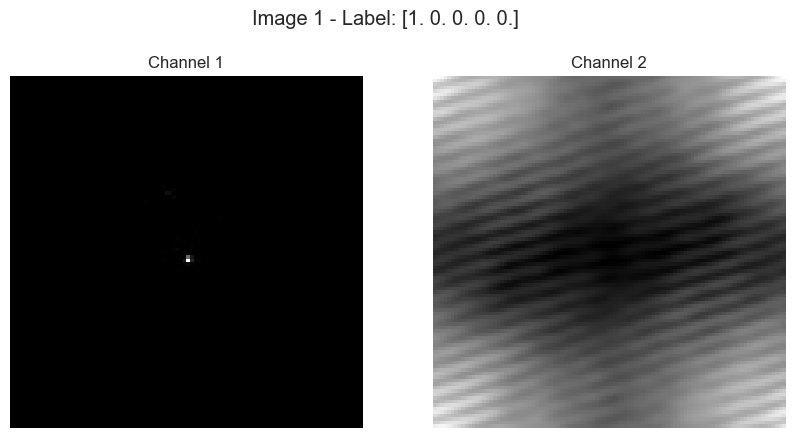

Min pixel value in channel 1: 0.0
Max pixel value in channel 1: 0.2709498405456543
Channel 1 is correctly normalized
Min pixel value in channel 2: 0.09691145271062851
Max pixel value in channel 2: 0.596838116645813
Channel 2 is correctly normalized


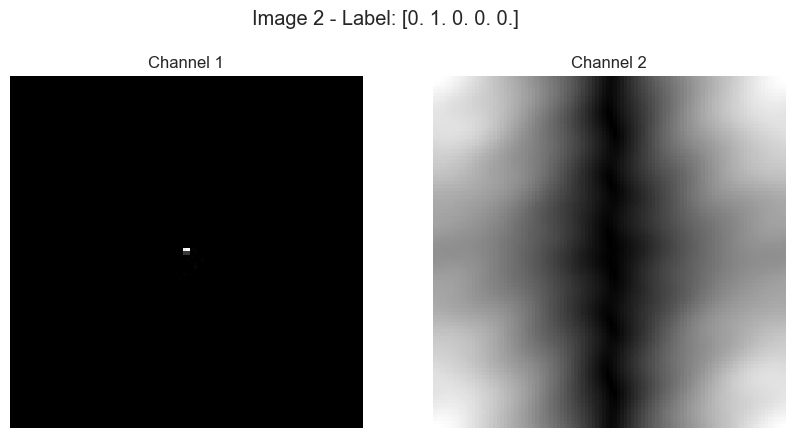

Min pixel value in channel 1: 0.0
Max pixel value in channel 1: 0.3390597701072693
Channel 1 is correctly normalized
Min pixel value in channel 2: 0.0045377337373793125
Max pixel value in channel 2: 0.871405839920044
Channel 2 is correctly normalized


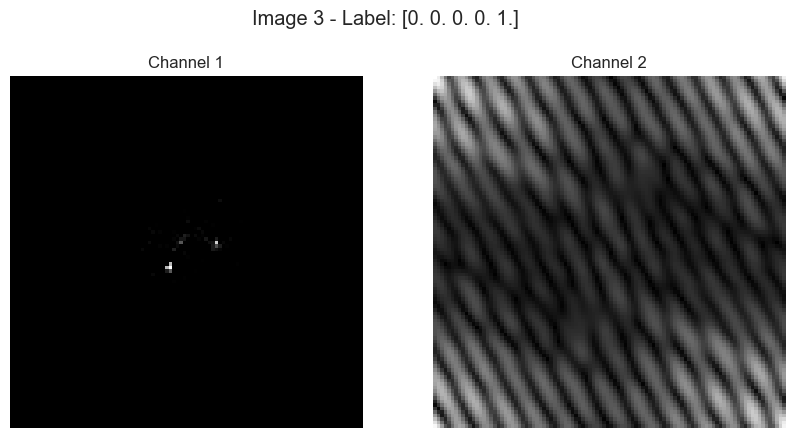

Min pixel value in channel 1: 0.0
Max pixel value in channel 1: 0.09663999080657959
Channel 1 is correctly normalized
Min pixel value in channel 2: 0.0024914296809583902
Max pixel value in channel 2: 0.6248902678489685
Channel 2 is correctly normalized


2024-06-14 10:56:45.691086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [28]:


# Assuming train_loader is a TensorFlow data loader with batches of images and labels
for images, labels in train_loader.take(1):
    visualize_image_channels(images, labels, num_images=3)

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def create_model(input_shape=(100, 100, 2), num_classes=5):
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create the model
input_shape = (100, 100, 2)
num_classes = 5
model = create_model(input_shape, num_classes)

# Print the model summary
model.summary()

/Users/bryphy/U/ML jet tag/JetTag/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,783,653 (25.88 MB)

 Trainable params: 6,781,669 (25.87 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

def create_model(input_shape=(100, 100, 2), num_classes=5):
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create the model
input_shape = (100, 100, 2)
num_classes = 5
model = create_model(input_shape, num_classes)

# Print the model summary
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('Models/best_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

# Assuming you have transformed data
n_batch = 128
train_loader = tf.data.Dataset.from_tensor_slices((X_train_transformed, y_train_transformed)).shuffle(buffer_size=len(X_train_transformed)).batch(n_batch)
val_loader = tf.data.Dataset.from_tensor_slices((X_val_transformed, y_val_transformed)).batch(n_batch)
test_loader = tf.data.Dataset.from_tensor_slices((X_test_transformed, y_test_transformed)).batch(n_batch)

# Train the model
history = model.fit(train_loader,
                    epochs=13,
                    validation_data=val_loader,
                    callbacks=callbacks)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 98, 98, 32)     │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,783,653 (25.88 MB)

 Trainable params: 6,781,669 (25.87 MB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/13
63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.3238 - loss: 2.1916 - val_accuracy: 0.2105 - val_loss: 6.7052 - learning_rate: 0.0010
Epoch 2/13
49/63 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.4306 - loss: 1.6552

KeyboardInterrupt: 